## 1. Importar librerías y .csv

Se importan las librerías básicas para el análisis de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

Se importa el archivo nations.cvs, el cual al importar presenta error de tipo UnicodeDecodeError, para corregir el error se utiliza encoding

In [2]:
df = pd.read_csv('nations.csv', encoding='gbk')

In [3]:
df.drop(columns = ['Unnamed: 0'], inplace = True)
df.head(5)

,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini
0,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.0,NaN
1,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.2,NaN
2,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.2,NaN
3,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.2,NaN
4,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.1,33.299999


## 2. Refactor gráficos matplotlib a seaborn

### a) binarize_histogram

- Se realiza refactorización de la función binarize_histogram, para ello se utiliza sns.distplot en lugar de plt.hist.
- Adicionalmente se corrigen los títulos de los histogramas, ya que el histograma de la izquierda corresponde a las observaciones de la variable 'adfert' que se encuentran bajo o igual a la media muestral, en cambio el histograma de la derecha corresponde a las observaciones que se encuentra sobre la media muestral 

In [6]:
def binarize_histogram(dataframe, variable):
    tmp = dataframe
    tmp['binarize'] = np.where(tmp[variable] > np.mean(tmp[variable]), 1, 0)

    hist_1 = tmp[tmp['binarize'] == 1][variable].dropna() #Valores mayor a la media muestral de la variable
    hist_0 = tmp[tmp['binarize'] == 0][variable].dropna() #Valores menor o igual a la media muestral de la variable
    
    sns.set(font_scale=1.3)
    plt.subplot(1, 2, 1)
    sns.distplot(hist_0, bins = 10, kde=False, label = variable)
    plt.axvline(np.mean(hist_0), color='r', ls="dotted", label = 'media')
    plt.title(f"Observaciones <= media muestral {round(np.mean(tmp[variable]),2)}")
    plt.legend()
    
    plt.subplot(1, 2, 2)
    sns.distplot(hist_1, bins = 10, kde=False, label = variable)
    plt.axvline(np.mean(hist_1), color='r', ls="dotted", label = 'media')
    plt.title(f"Observaciones > media muestral {round(np.mean(tmp[variable]),2)}")
    
    plt.legend()

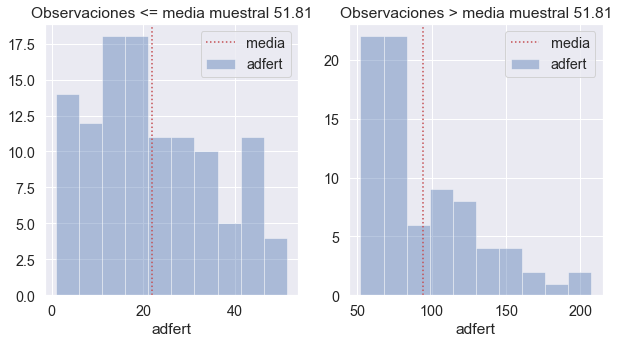

In [7]:
binarize_histogram(df, 'adfert')

### b) grouped_boxplot

- Se utiliza la función boxplot de seaborn, se realiza la agrupación por región en el eje x

In [75]:
def grouped_boxplot(dataframe, variable, group_by):
    sns.set(font_scale=1.3)
    sns.boxplot(x= dataframe[group_by], y= dataframe[variable], width = 0.3)
    plt.title(f"Diagrama BoxPlot de la variable {variable}")

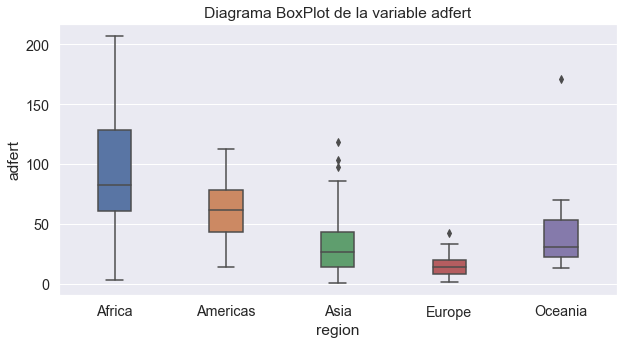

In [76]:
grouped_boxplot(df, 'adfert', 'region')

- Se utiliza la función scatterplot de seaborn, en este caso la agrupación se identifica por el color 

In [71]:
def grouped_scatterplot(dataframe, x, y, group_by):
    sns.set(font_scale=1.3)
    sns.scatterplot(data = dataframe, x = x, y = y, hue = group_by)
    plt.title(f"Diagrama de dispersión x: {x}, y: {y}")

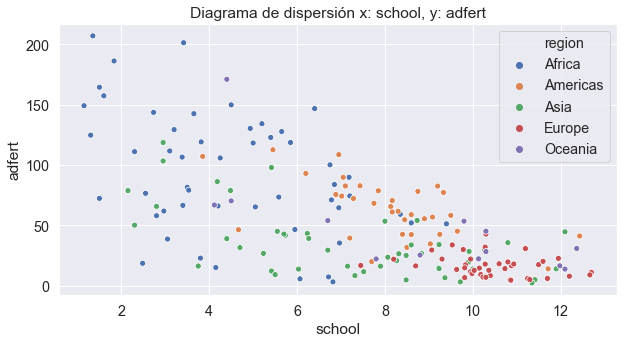

In [72]:
grouped_scatterplot(df, 'school', 'adfert', 'region')

## 3. Genere un heatmap entre todas las variables

- Generamos la matriz de correlación entre variables. Además transformamos los valores de correlación en valor absoluto con el fin de evaluar si existe correlación >0.6 entre las variables 

In [46]:
df.drop(columns = ['binarize'], inplace = True)

KeyError: "['binarize'] not found in axis"

In [47]:
df_corr = df.corr().abs()
df_corr

,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini
gdp,1.000000,0.573280,0.517120,0.516019,0.611219,0.053251,0.656482,0.009827,0.442487,0.826819,0.079037
school,0.573280,1.000000,0.675219,0.772668,0.725207,0.058784,0.565080,0.094663,0.854910,0.416818,0.201446
adfert,0.517120,0.675219,1.000000,0.777416,0.731787,0.004868,0.451075,0.032290,0.676430,0.437615,0.354003
chldmort,0.516019,0.772668,0.777416,1.000000,0.923563,0.005432,0.556266,0.137984,0.790070,0.416292,0.063676
life,0.611219,0.725207,0.731787,0.923563,1.000000,0.005418,0.623945,0.174210,0.664518,0.445990,0.025493
pop,0.053251,0.058784,0.004868,0.005432,0.005418,1.000000,0.066228,0.057245,0.030396,0.023302,0.015499
urban,0.656482,0.565080,0.451075,0.556266,0.623945,0.066228,1.000000,0.165942,0.478254,0.522432,0.138066
femlab,0.009827,0.094663,0.032290,0.137984,0.174210,0.057245,0.165942,1.000000,0.075675,0.101363,0.049513
literacy,0.442487,0.854910,0.676430,0.790070,0.664518,0.030396,0.478254,0.075675,1.000000,0.349137,0.028563
co2,0.826819,0.416818,0.437615,0.416292,0.445990,0.023302,0.522432,0.101363,0.349137,1.000000,0.110875


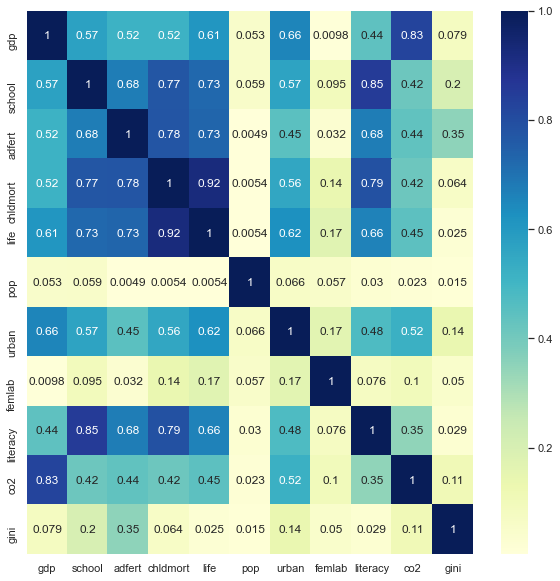

In [48]:
plt.figure(figsize = (10,10))
sns.set(font_scale=1)
sns.heatmap(df_corr, cmap = 'YlGnBu', annot=True )

Dado que el criterio para consdierar correlación entre variables es con un valor de correlación absoluto superior a 0.6 se determinan las principales correlaciones existentes en la muestra

Principales correlaciones existentes son:
- school x literacy, corr = 0,85
- gdp x co2, corr = 0,83
- adfert x chldmort, corr = 0,78
- school x life, corr = 0,73
- gdp x urban, corr = 0,66
- life x literacy, corr = 0,66
- life x urban, corr = 0,62
- gdp x life, corr = 0,61
- life x chlmort = -0.92

## 4.  En base a las principales correlaciones, sepárelas en un nuevo objeto y calcule la matriz de correlaciones para todas las regiones

In [49]:
df_new = df.loc[:, ['region', 'gdp', 'school', 'adfert', 'chldmort', 'life', 'urban', 'literacy', 'co2']]
df_new

,region,gdp,school,adfert,chldmort,life,urban,literacy,co2
0,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,64.933334,72.599998,15.00
1,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,41.000000,41.700001,1.20
2,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,59.250000,84.099998,9.20
3,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,23.583334,23.600000,0.20
4,Africa,349.200012,2.483333,18.600000,168.50,48.866665,10.250000,66.599998,0.10
...,...,...,...,...,...,...,...,...,...
189,Oceania,4012.600098,10.300000,28.299999,26.75,71.533333,20.666668,98.800003,3.10
190,Oceania,2249.199951,4.500000,70.300003,36.00,66.500000,17.766666,NaN,1.40
191,Oceania,4072.199951,10.133333,22.299999,19.25,71.833336,23.266666,99.000000,4.85
192,Oceania,NaN,NaN,23.299999,36.50,66.033333,49.233334,NaN,NaN


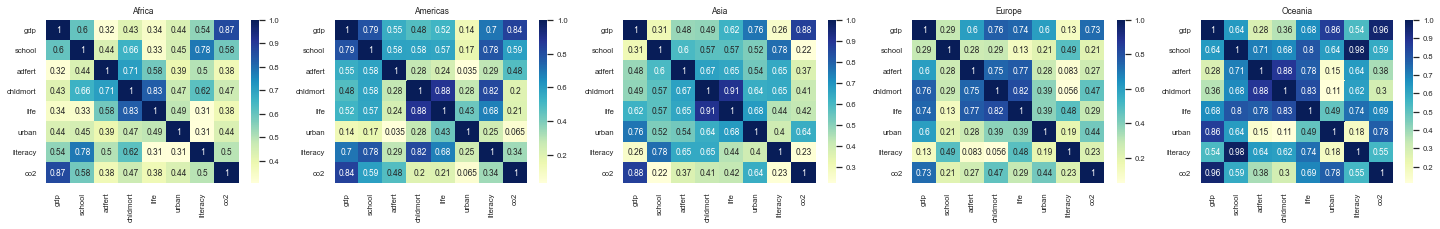

In [82]:
plt.figure(figsize=(25, 3))
sns.set(font_scale=0.7)
tmp = df_new['region'].unique()
i = 0
for region in list(tmp):
    plt.subplot(1, 5, i+1)
    df_map_region = df_new[df_new['region'] == region].corr().abs()
    sns.heatmap(df_map_region, cmap = 'YlGnBu', annot=True)
    plt.title(region)
    i+=1

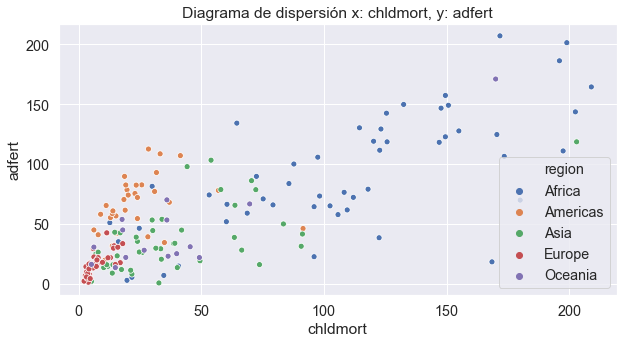

In [83]:
grouped_scatterplot(df_new, 'chldmort', 'adfert', 'region')


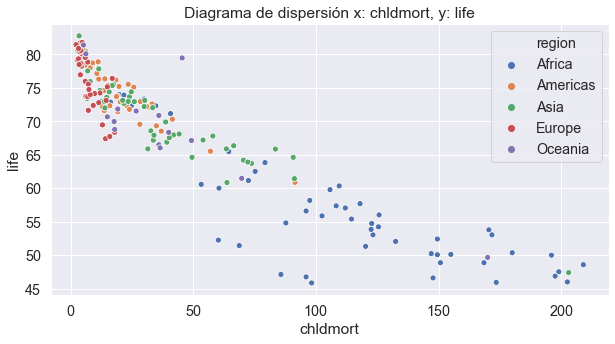

In [80]:
grouped_scatterplot(df_new, 'chldmort', 'life', 'region')

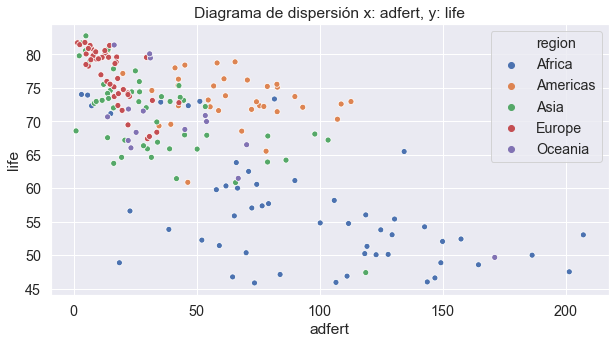

In [81]:
grouped_scatterplot(df_new, 'adfert', 'life', 'region')